### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Set file paths
hd_data = Path("../4.1/Resources/HD.csv")
jnj_data = Path("../4.1/Resources/JNJ.csv")
intc_data = Path("../4.1/Resources/INTC.csv")
amd_data = Path("../4.1/Resources/AMD.csv")
mu_data = Path("../4.1/Resources/MU.csv")
nvda_data = Path("../4.1/Resources/NVDA.csv")
tsm_data = Path("../4.1/Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


### Combine the DataFrames

In [3]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([jnj, hd, intc, amd, mu, nvda, tsm], axis="columns", join="inner")
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,66.97,191.62,45.17,27.32,38.51,162.04,41.97
5/13/19,66.49,190.34,44.76,26.24,37.38,158.45,40.99
5/10/19,67.22,194.58,46.20,27.96,38.94,168.82,42.83
5/9/19,66.04,194.58,46.62,27.21,39.27,170.19,43.25
5/8/19,66.02,195.17,49.24,27.09,39.75,173.92,43.70


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change()
daily_returns.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.007167,-0.006680,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.010979,0.022276,0.032172,0.065549,0.041734,0.065447,0.044889
5/9/19,-0.017554,0.000000,0.009091,-0.026824,0.008475,0.008115,0.009806
5/8/19,-0.000303,0.003032,0.056199,-0.004410,0.012223,0.021917,0.010405


### Calculate Correlation

In [5]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
JNJ,1.000000,0.329386,0.318188,0.254498,0.337060,0.257717,0.317493
HD,0.329386,1.000000,0.429047,0.294653,0.375932,0.360918,0.393293
INTC,0.318188,0.429047,1.000000,0.385877,0.511066,0.483262,0.500741
AMD,0.254498,0.294653,0.385877,1.000000,0.438329,0.471212,0.352482
MU,0.337060,0.375932,0.511066,0.438329,1.000000,0.517198,0.477247
NVDA,0.257717,0.360918,0.483262,0.471212,0.517198,1.000000,0.472496
TSM,0.317493,0.393293,0.500741,0.352482,0.477247,0.472496,1.000000


### Plot Correlation

<AxesSubplot:>

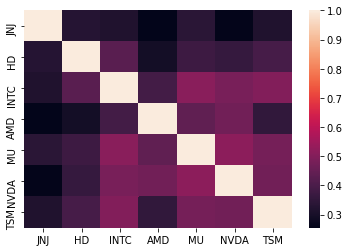

In [6]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

<AxesSubplot:>

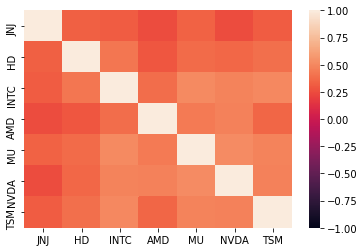

In [7]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?

`AMD` stock would be the best candidate to add to the existing portfolio as it is the stock that has the least correlation with `JNJ` and `HD`.